<a href="https://colab.research.google.com/github/Preetirai-tech/Central-Limit-Theorem/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For this case study, the 'Fare' feature from the Titanic Dataset is employed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Assume that we do not have all of the population's data. Let us take samples from this population. After drawing samples, we apply the Central Limit Theorem and compute the mean of each sample. Since we have population statistics, we can calculate population mean. We will compare how similar they are.

In [10]:
# Let's combine the two dataframes, train_df and test_df, to get the entire population
df = pd.concat([train_df.drop(columns = ['Survived']), test_df]).sample(1309) # suffling

<Axes: ylabel='Density'>

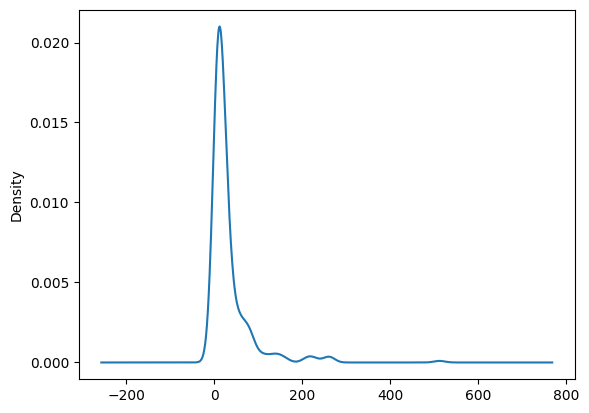

In [11]:
df['Fare'].plot(kind = 'kde')

In [26]:
# Let's draw samples from our population
# Sample size = 50 -> 100 times

samples = []
for i in range(100):
  samples.append(df['Fare'].dropna().sample(50).values.tolist())

In [27]:
samples = np.array(samples)

In [28]:
# Calculate the mean of each sample
sampling_means = samples.mean(axis = 1)

<Axes: ylabel='Density'>

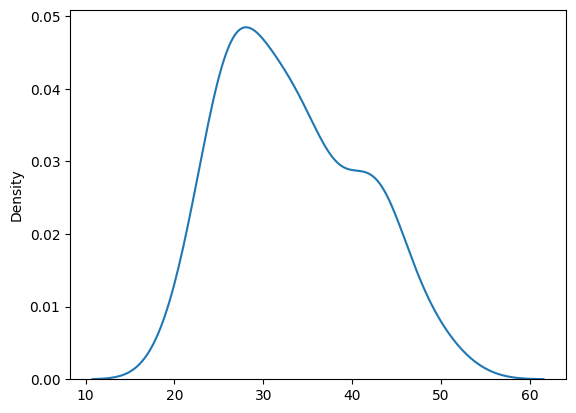

In [29]:
sns.kdeplot(sampling_means)

Result: A graph that is nearly normally distributed.<br>
Why?<br>
Because it follows Central Limit Theorem.

In [31]:
# Calculate the mean of the sample

sampling_means.mean()

33.254007120000004

In [32]:
# Calculate the standard deviation of the sample

sampling_means.std()/np.sqrt(50)        # std/sqrt(n)

1.0783893939120515

In [33]:
# Calculate lower limit ie mean - 2 std

lower_limit = sampling_means.mean() - 2 * sampling_means.std()/np.sqrt(50) 
  

# Calculate upper limit ie mean + 2 std

upper_limit = sampling_means.mean() + 2 * sampling_means.std()/np.sqrt(50)   


In [34]:
print('The range is', lower_limit, '-', upper_limit)

The range is 31.097228332175902 - 35.410785907824106


Inference: The population has a 95% chance of being in the range of 31-35.

In [35]:
# Let's check our population mean

df['Fare'].mean()

33.29547928134557

This is a demonstration of the Central Limit Theorem in which we do not know the value of our population mean. The range was obtained using the Central Limit Theorem. There is a 95% chance that the population mean will be in the 31-35 range.

We discovered that our population mean of 33.29 falls inside the specified range. 


